In [1]:
from dataloader import load_data_label_encoded
from trainer import train_model, evaluate_model
from snn import SNNModelSimple
import torch
import matplotlib.pyplot as plt
import pickle

In [ ]:
root_folder = "./tactile_dataset/"
file_name = "final_merged_df_sw500.csv"

train_losses_wd = {}
train_accuracies_wd = {}
val_losses_wd = {}
val_accuracies_wd = {}
test_accuracies_wd = {}

for wd in [1e-5, 1e-4, 5e-4]:
    print(f"Training for weight decay={wd}")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_label_encoded(root_folder, file_name, num_steps=100, batch_size=128)

    model = SNNModelSimple(num_features, num_outputs)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=wd)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_wd[wd] = train_losses
    train_accuracies_wd[wd] = train_accuracies
    val_losses_wd[wd] = val_losses
    val_accuracies_wd[wd] = val_accuracies

    test_accuracies_wd[wd] = evaluate_model(model, test_loader)

out_file_name = 'exp4_wd_1e-5_5e-4_t_100_bs_128_ep_10_lr_1e-3.pkl'
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_wd, "train_accuracies": train_accuracies_wd, "val_losses": val_losses_wd, "val_accuracies": val_accuracies_wd, "test_accuracies": test_accuracies_wd}, f)


Training for weight decay=1e-05
Epoch 1/10, Train Loss: 1.8902, Train Accuracy: 30.97%, Val Loss: 1.7294, Val Accuracy: 35.68%, Time: 32.17s
Epoch 2/10, Train Loss: 1.6874, Train Accuracy: 36.30%, Val Loss: 1.7225, Val Accuracy: 36.43%, Time: 31.50s
Epoch 3/10, Train Loss: 1.6581, Train Accuracy: 36.93%, Val Loss: 1.6795, Val Accuracy: 35.80%, Time: 32.36s
Epoch 4/10, Train Loss: 1.6277, Train Accuracy: 37.73%, Val Loss: 1.6231, Val Accuracy: 38.65%, Time: 33.20s
Epoch 5/10, Train Loss: 1.6225, Train Accuracy: 37.94%, Val Loss: 1.6628, Val Accuracy: 36.47%, Time: 33.28s
Epoch 6/10, Train Loss: 1.6106, Train Accuracy: 38.33%, Val Loss: 1.6460, Val Accuracy: 38.66%, Time: 35.50s
Epoch 7/10, Train Loss: 1.5973, Train Accuracy: 38.83%, Val Loss: 1.6368, Val Accuracy: 37.46%, Time: 41.92s
Epoch 8/10, Train Loss: 1.5913, Train Accuracy: 39.18%, Val Loss: 1.6231, Val Accuracy: 39.17%, Time: 41.76s
Epoch 9/10, Train Loss: 1.5894, Train Accuracy: 39.13%, Val Loss: 1.6022, Val Accuracy: 39.62%, 

In [3]:
for wd in [0, 1e-3, 5e-3]:
    print(f"Training for weight decay={wd}")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_label_encoded(root_folder, file_name, num_steps=100, batch_size=128)

    model = SNNModelSimple(num_features, num_outputs)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=wd)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_wd[wd] = train_losses
    train_accuracies_wd[wd] = train_accuracies
    val_losses_wd[wd] = val_losses
    val_accuracies_wd[wd] = val_accuracies

    test_accuracies_wd[wd] = evaluate_model(model, test_loader)

out_file_name = 'exp4_wd_0_5e-3_t_100_bs_128_ep_10_lr_1e-3.pkl'
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_wd, "train_accuracies": train_accuracies_wd, "val_losses": val_losses_wd, "val_accuracies": val_accuracies_wd, "test_accuracies": test_accuracies_wd}, f)


Training for weight decay=0
Epoch 1/10, Train Loss: 1.9051, Train Accuracy: 30.85%, Val Loss: 1.7812, Val Accuracy: 35.25%, Time: 38.55s
Epoch 2/10, Train Loss: 1.6899, Train Accuracy: 36.48%, Val Loss: 1.7378, Val Accuracy: 36.12%, Time: 37.88s
Epoch 3/10, Train Loss: 1.6481, Train Accuracy: 37.40%, Val Loss: 1.6808, Val Accuracy: 35.25%, Time: 37.76s
Epoch 4/10, Train Loss: 1.6225, Train Accuracy: 37.85%, Val Loss: 1.6072, Val Accuracy: 38.78%, Time: 37.74s
Epoch 5/10, Train Loss: 1.6154, Train Accuracy: 38.30%, Val Loss: 1.6446, Val Accuracy: 35.84%, Time: 37.87s
Epoch 6/10, Train Loss: 1.5972, Train Accuracy: 38.73%, Val Loss: 1.6258, Val Accuracy: 38.43%, Time: 38.68s
Epoch 7/10, Train Loss: 1.5843, Train Accuracy: 39.29%, Val Loss: 1.5919, Val Accuracy: 39.48%, Time: 39.09s
Epoch 8/10, Train Loss: 1.5744, Train Accuracy: 39.47%, Val Loss: 1.6068, Val Accuracy: 38.93%, Time: 38.46s
Epoch 9/10, Train Loss: 1.5770, Train Accuracy: 39.44%, Val Loss: 1.5777, Val Accuracy: 39.83%, Time

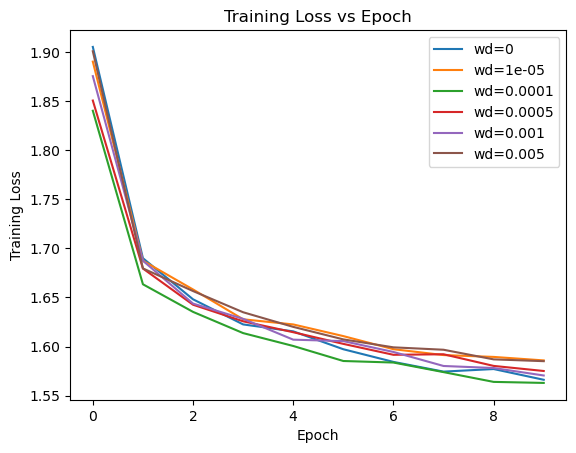

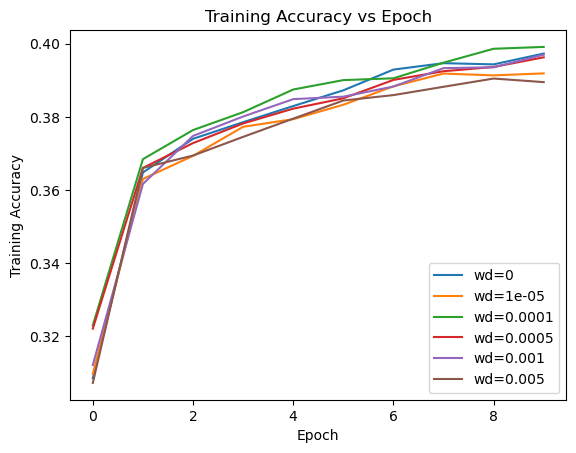

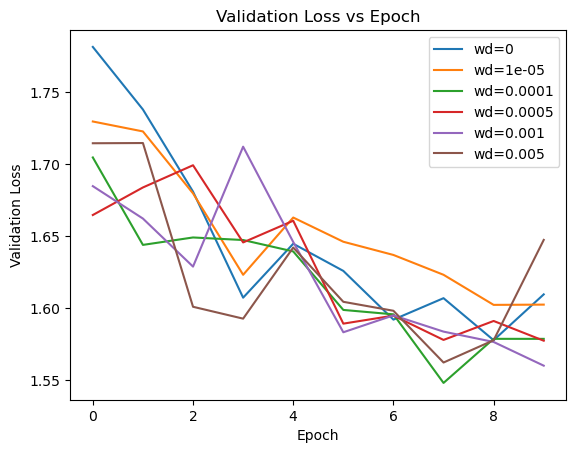

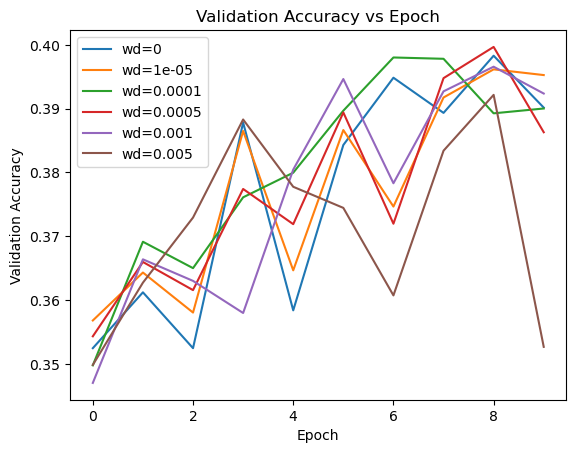

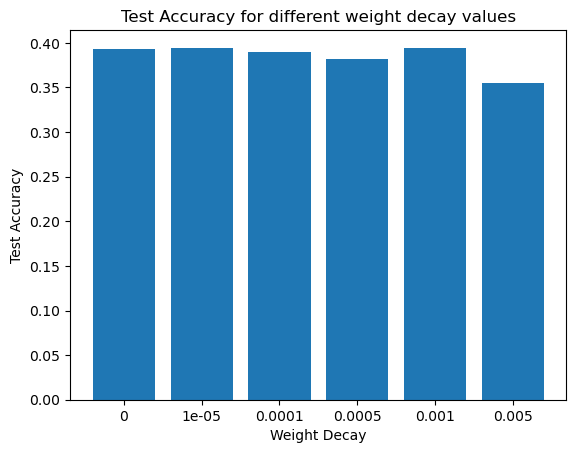

In [4]:
# Plotting
wd = [0, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3]

plt.figure()
for w in wd:
    plt.plot(train_losses_wd[w], label=f"wd={w}")
    plt.xlabel("Epoch") 
    plt.ylabel("Training Loss")
    plt.legend()
    plt.title("Training Loss vs Epoch")

plt.figure()
for w in wd:
    plt.plot(train_accuracies_wd[w], label=f"wd={w}")
    plt.xlabel("Epoch")
    plt.ylabel("Training Accuracy")
    plt.legend()
    plt.title("Training Accuracy vs Epoch")

plt.figure()
for w in wd:
    plt.plot(val_losses_wd[w], label=f"wd={w}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.legend()
    plt.title("Validation Loss vs Epoch")

plt.figure()
for w in wd:
    plt.plot(val_accuracies_wd[w], label=f"wd={w}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.title("Validation Accuracy vs Epoch")

plt.figure()
plt.bar([str(w) for w in wd], [test_accuracies_wd[w] for w in wd])
plt.xlabel("Weight Decay")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy for different weight decay values")
plt.show()

